In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gluoncv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 33.6 MB/s 


In [ ]:
!pip install mxnet-cu112

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 499.4 MB 1.7 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
!export LD_LIBRARY_PATH=/usr/local/cuda-9.0/lib64 && sudo ldconfig

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda

--2022-09-10 16:19:46--  https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.39.144
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.39.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 [following]
--2022-09-10 16:19:47--  https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb?05Orwuc-9f1qItyr6oJwNVMna01I_BMhPUTkyk61or6363AY5hDTiTL34LeiFpqiXkQPtnjUKyjBHcmcqydxzBp6psd61s_hkRKBRWi2epWxc

In [ ]:
!cat /usr/local/lib/python3.7.13/dist-packages/external/local_config_cuda/cuda/cuda/cuda_config.h |\
grep TF_CUDA_VERSION

cat: /usr/local/lib/python3.7.13/dist-packages/external/local_config_cuda/cuda/cuda/cuda_config.h: No such file or directory


In [ ]:
!apt-get update
!apt-get install nvidia-cuda-toolkit

Get:1 file:/var/cuda-repo-9-2-local  InRelease
Ign:1 file:/var/cuda-repo-9-2-local  InRelease
Get:2 file:/var/cuda-repo-9-2-local  Release [574 B]
Get:2 file:/var/cuda-repo-9-2-local  Release [574 B]
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpa

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Jun__8_16:49:14_PDT_2022
Cuda compilation tools, release 11.7, V11.7.99
Build cuda_11.7.r11.7/compiler.31442593_0


In [ ]:
!nvidia-smi

Sat Sep 10 16:25:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!export PATH=/usr/local/cuda/bin:$PATH
!export LD_LIBRARY_PATH=/usr/local/cuda/lib64:$LD_LIBRARY_PATH

In [ ]:
!sudo ldconfig

In [ ]:
from __future__ import division

import argparse, time, logging, os, sys, math

import numpy as np
import mxnet as mx
import gluoncv as gcv
from mxnet import gluon, nd, init, context
from mxnet import autograd as ag
from mxnet.gluon import nn
from mxnet.gluon.data.vision import transforms

from gluoncv.data.transforms import video
from gluoncv.data import VideoClsCustom
from gluoncv.model_zoo import get_model
from gluoncv.utils import makedirs, LRSequential, LRScheduler, split_and_load, TrainingHistory
import cv2

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.12.1+cu113` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [ ]:
with open("/content/drive/MyDrive/Annotation_file/train.txt","r") as f:
        text = f.readlines()
        text = [x.strip() for x in text ]
        for x in text:
            action = x.split(" ")[0].split("/")[-1]
            frame = x.split(" ")[1]
            label = x.split(" ")[-1]
            with open("./Annotation_train_HAR.txt","a") as f:
                f.write(f"/content/drive/MyDrive/processed_data/{action}"+" "+frame+" "+label + "\n")

In [ ]:
k=0
path = "/content/drive/MyDrive/processed_data/"
raw = "/content/drive/MyDrive/HAR-RAW_DATA/"
labels = {"clapping_action":0,"sit_down_action":1,"stand_up_action":2,"walking_action":3}
for i in os.listdir(path):
    frames=[]
    action = i.split("_")
    if type(action[0]) == str and type(action[1]) == str and action[2].isalpha() and type(action[2])==str :
       action_name = action[0] +"_"+ action[1] +"_"+ action[2]
    else:
       action_name = action[0] +"_"+ action[1]
    for j in os.listdir(path+i):
      frames.append(j)
    with open("./Annotation_train_HAR.txt","a") as f:
         f.write(str(i)+" "+str(labels[action_name]) + "\n")

In [ ]:
path = "/content/drive/MyDrive/processed_data/"
labels = {"clapping_action":0,"sit_down_action":1,"stand_up_action":2,"walking_action":3}
for i in os.listdir(path):
    frames=[]
    action = i.split("_")
    if type(action[0]) == str and type(action[1]) == str and action[2].isalpha() and type(action[2])==str :
       action_name = action[0] +"_"+ action[1] +"_"+ action[2]
    else:
       action_name = action[0] +"_"+ action[1]
    for j in os.listdir(path+i):
      frames.append(j)
    with open("./Annotation_train_HAR.txt","a") as f:
         f.write(f"/content/drive/MyDrive/HAR-RAW_DATA/"+action_name+"/"+str(i)+".mp4"+" "+str(len(frames)-1)+" "+str(labels[action_name]) + "\n")


In [ ]:
!pip install decord --force

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.6 MB 17.0 MB/s 
     |████████████████████████████████| 15.7 MB 59.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [ ]:
transform_train = transforms.Compose([
    # Fix the input video frames size as 256×340 and randomly sample the cropping width and height from
    # {256,224,192,168}. After that, resize the cropped regions to 224 × 224.
    video.VideoMultiScaleCrop(size=(256, 340), scale_ratios=[1.0, 0.875, 0.75, 0.66]),
    # Randomly flip the video frames horizontally
    video.VideoRandomHorizontalFlip(),
    # Transpose the video frames from height*width*num_channels to num_channels*height*width
    # and map values from [0, 255] to [0,1]
    video.VideoToTensor(),
    # Normalize the video frames with mean and standard deviation calculated across all images
    video.VideoNormalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
num_gpus = 1
ctx = [mx.gpu(i) for i in range(num_gpus)]
#transform_train = video.VideoGroupTrainTransform(size=(224, 224), scale_ratios=[1.0, 0.875], mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
per_device_batch_size = 5
# Number of data loader workers
num_workers = 0
transform_train = transforms.Compose([
    # Fix the input video frames size as 256×340 and randomly sample the cropping width and height from
    # {256,224,192,168}. After that, resize the cropped regions to 224 × 224.
    video.VideoMultiScaleCrop(size=(224, 224), scale_ratios=[1.0, 0.875, 0.75, 0.66]),
    # Randomly flip the video frames horizontally
    video.VideoRandomHorizontalFlip(),
    # Transpose the video frames from height*width*num_channels to num_channels*height*width
    # and map values from [0, 255] to [0,1]
    video.VideoToTensor(),
    # Normalize the video frames with mean and standard deviation calculated across all images
    video.VideoNormalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
# Calculate effective total batch size
batch_size = per_device_batch_size * num_gpus
train_dataset = VideoClsCustom(root=os.path.expanduser("/content/drive/MyDrive/HAR-RAW_DATA/" ),
                               setting=os.path.expanduser('/content/Annotation_train_HAR.txt'),
                               train=True,
                               new_length=64,
                               slowfast=True,
                               video_loader=True,
                               use_decord=True,
                               slow_temporal_stride=16,
                               fast_temporal_stride=2,
                               transform=transform_train)
print('Load %d training samples.' % len(train_dataset))
train_data = gluon.data.DataLoader(train_dataset, batch_size=batch_size,
                                   shuffle=True, num_workers=num_workers)

Load 395 training samples.


In [ ]:
train_dataset = VideoClsCustom(root=os.path.expanduser("/content/drive/MyDrive/HAR-RAW_DATA/" ),
                               setting=os.path.expanduser('/content/Annotation_train_HAR.txt'),
                               train=True,
                               new_length=20,
                               video_loader=True,
                               use_decord=True,
                               slowfast=True,
                               slow_temporal_stride=16,
                               fast_temporal_stride=2,
                               transform=transform_train)

In [ ]:
num_gpus = 1
ctx = [mx.gpu(i) for i in range(num_gpus)]
#transform_train = video.VideoGroupTrainTransform(size=(224, 224), scale_ratios=[1.0, 0.875], mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
per_device_batch_size = 5
# Number of data loader workers
num_workers = 0
transform_train = transforms.Compose([
    # Fix the input video frames size as 256×340 and randomly sample the cropping width and height from
    # {256,224,192,168}. After that, resize the cropped regions to 224 × 224.
    video.VideoMultiScaleCrop(size=(224, 224), scale_ratios=[1.0, 0.875, 0.75, 0.66]),
    # Randomly flip the video frames horizontally
    video.VideoRandomHorizontalFlip(),
    # Transpose the video frames from height*width*num_channels to num_channels*height*width
    # and map values from [0, 255] to [0,1]
    video.VideoToTensor(),
    # Normalize the video frames with mean and standard deviation calculated across all images
    video.VideoNormalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
# Calculate effective total batch size
batch_size = per_device_batch_size * num_gpus

)
print('Load %d training samples.' % len(train_dataset))
train_data = gluon.data.DataLoader(train_dataset, batch_size=batch_size,
                                   shuffle=True, num_workers=num_workers)

Load 395 training samples.


In [ ]:
print(ctx)

[gpu(0)]


In [ ]:
net = get_model(name='slowfast_4x16_resnet50_custom',nclass=4,use_kinetics_pretrain=True,pretrained_base=False,pretrained = False,ctx=mx.gpu())
net.collect_params().reset_ctx(mx.gpu())
print(net)

In [ ]:
!sudo apt-get upgrade --fix-broken

In [ ]:
lr_decay = 0.1
warmup_epoch = 34
total_epoch = 196
num_batches = len(train_data)
lr_scheduler = LRSequential([
    LRScheduler('linear', base_lr=0.01, target_lr=0.1,
                nepochs=warmup_epoch, iters_per_epoch=num_batches),
    LRScheduler('cosine', base_lr=0.1, target_lr=0,
                nepochs=total_epoch - warmup_epoch,
                iters_per_epoch=num_batches,
                step_factor=lr_decay, power=2)
])

# Stochastic gradient descent
optimizer = 'sgd'
# Set parameters
optimizer_params = {'learning_rate': 0.01, 'wd': 0.0001, 'momentum': 0.9}
optimizer_params['lr_scheduler'] = lr_scheduler

# Define our trainer for net
trainer = gluon.Trainer(net.collect_params(), optimizer, optimizer_params)

In [ ]:
loss_fn = gluon.loss.SoftmaxCrossEntropyLoss()
train_metric = mx.metric.Accuracy()
train_history = TrainingHistory(['training-acc'])

[Epoch 0] train=0.513924 loss=1.159923 time: 278.722597


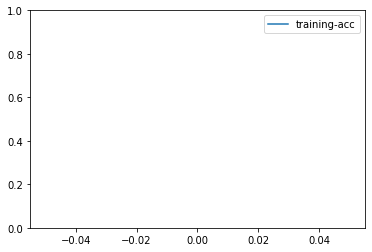

In [ ]:
epochs = 1

for epoch in range(epochs):
    tic = time.time()
    train_metric.reset()
    train_loss = 0

    # Loop through each batch of training data
    for i, batch in enumerate(train_data):
        # Extract data and label
        data = split_and_load(batch[0], ctx_list=ctx, batch_axis=0)
        label = split_and_load(batch[1], ctx_list=ctx, batch_axis=0)

        # AutoGrad
        with ag.record():
            output = []
            for _, X in enumerate(data):
                X = X.reshape((-1,) + X.shape[2:])
                pred = net(X)
                output.append(pred)
            loss = [loss_fn(yhat, y) for yhat, y in zip(output, label)]

        # Backpropagation
        for l in loss:
            l.backward()

        # Optimize
        trainer.step(batch_size)

        # Update metrics
        train_loss += sum([l.mean().asscalar() for l in loss])
        train_metric.update(label, output)

    name, acc = train_metric.get()

    # Update history and print metrics
    train_history.update([acc])
    print('[Epoch %d] train=%f loss=%f time: %f' %
        (epoch, acc, train_loss / (i+1), time.time()-tic))

# We can plot the metric scores with:
train_history.plot()

In [ ]:
from gluoncv.utils.filesystem import try_import_decord
import matplotlib.pyplot as plt
import numpy as np
import mxnet as mx
from mxnet import gluon, nd, image
from mxnet.gluon.data.vision import transforms
from gluoncv.data.transforms import video
from gluoncv import utils
from gluoncv.model_zoo import get_model


decord = try_import_decord()
url = 'https://github.com/bryanyzhu/tiny-ucf101/raw/master/abseiling_k400.mp4'
video_fname = utils.download(url)
vr = decord.VideoReader(video_fname)
fast_frame_id_list = range(0, 64, 2)
slow_frame_id_list = range(0, 64, 16)
frame_id_list = list(fast_frame_id_list) + list(slow_frame_id_list)
video_data = vr.get_batch(frame_id_list).asnumpy()
clip_input = [video_data[vid, :, :, :] for vid, _ in enumerate(frame_id_list)]
transform_fn = video.VideoGroupValTransform(size=224, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
clip_input = transform_fn(clip_input)
clip_input = np.stack(clip_input, axis=0)
clip_input = clip_input.reshape((-1,) + (36, 3, 224, 224))
clip_input = np.transpose(clip_input, (0, 2, 1, 3, 4))
print('Video data is downloaded and preprocessed.')

Video data is downloaded and preprocessed.


In [ ]:
pred = net(nd.array(clip_input))
classes = net.classes
topK = 5
ind = nd.topk(pred, k=topK)[0].astype('int')
print('The input video clip is classified to be')
for i in range(topK):
    print('\t[%s], with probability %.3f.'%(classes[ind[i].asscalar()], nd.softmax(pred)[0][ind[i]].asscalar()))

In [ ]:
!wget https://dl.fbaipublicfiles.com/pyslowfast/dataset/class_names/kinetics_classnames.json

--2022-09-06 16:52:56--  https://dl.fbaipublicfiles.com/pyslowfast/dataset/class_names/kinetics_classnames.json
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10326 (10K) [text/plain]
Saving to: ‘kinetics_classnames.json’

kinetics_classnames 100%[===================>]  10.08K  --.-KB/s    in 0s      

2022-09-06 16:52:57 (72.2 MB/s) - ‘kinetics_classnames.json’ saved [10326/10326]



In [ ]:
params = net.collect_params()
for param in params.values():
    print(param.name,param.data())

In [ ]:
net = get_model(name='i3d_resnet50_v1_custom', use_kinetics_pretrain = True, nclass=4,pretrained_base=False,ctx=mx.gpu())
net.load_parameters("/content/drive/MyDrive/Slow_fast_param/Har_model-model.params",ctx=mx.gpu())
#net.collect_params().reset_ctx(ctx)

100%|██████████| 208483/208483 [00:04<00:00, 44377.43KB/s]


In [ ]:
file_name = "/content/drive/MyDrive/Slow_fast_weights/har_action_net_misha_slow_fast.params"
net.save_parameters(file_name,ctx)

In [ ]:
file_name = "/content/drive/MyDrive/Slow_fast_weights/har_action_slowfast_net.params"
net.save_parameters(file_name,ctx)

In [ ]:
params = dict(net.collect_params())
print(params)
weight = params["conv0_weight"].data()

{'conv0_weight': Parameter conv0_weight (shape=(64, 3, 5, 7, 7), dtype=<class 'numpy.float32'>), 'batchnorm0_gamma': Parameter batchnorm0_gamma (shape=(64,), dtype=<class 'numpy.float32'>), 'batchnorm0_beta': Parameter batchnorm0_beta (shape=(64,), dtype=<class 'numpy.float32'>), 'batchnorm0_running_mean': Parameter batchnorm0_running_mean (shape=(64,), dtype=<class 'numpy.float32'>), 'batchnorm0_running_var': Parameter batchnorm0_running_var (shape=(64,), dtype=<class 'numpy.float32'>), 'layer1_0_conv0_weight': Parameter layer1_0_conv0_weight (shape=(64, 64, 3, 1, 1), dtype=<class 'numpy.float32'>), 'layer1_0_batchnorm0_gamma': Parameter layer1_0_batchnorm0_gamma (shape=(64,), dtype=<class 'numpy.float32'>), 'layer1_0_batchnorm0_beta': Parameter layer1_0_batchnorm0_beta (shape=(64,), dtype=<class 'numpy.float32'>), 'layer1_0_batchnorm0_running_mean': Parameter layer1_0_batchnorm0_running_mean (shape=(64,), dtype=<class 'numpy.float32'>), 'layer1_0_batchnorm0_running_var': Parameter la

In [ ]:
print(params["conv0_weight"].data().context)

gpu(0)


In [ ]:
params["conv0_weight"].data(ctx=mx.gpu(0))

In [ ]:
net.save("/content/drive/MyDrive/Slow_fast_weights/Har_model")

In [ ]:
!python feat_extract.py --data-list video.txt --model i3d_resnet50_v1_custom --save-dir ./features

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.12.1+cu113` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '
INFO:logger:Namespace(data_aug='v1', data_dir='', data_list='video.txt', dtype='float32', fast_temporal_stride=2, gpu_id=0, hashtag='', input_size=224, log_interval=10, mode=None, model='i3d_resnet50_v1_custom', need_root=False, new_height=256, new_length=32, new_step=1, new_width=340, num_classes=400, num_crop=1, num_segments=1, resume_params='', save_dir='./features', slow_temporal_stride=16, slowfast=False, ten_crop=False, three_crop=False, use_decord=True, use_pretrained=True, video_loader=True)
[08:44:47] ../src/base.cc:79: cuDNN lib mismatch: linked-against version 8005 != compiled-against version 8101.  Set MXNET_CUDNN_LIB_CHECKING=0 to quiet this warni

In [ ]:
!python inference.py --data-list video.txt --model "slowfast_4x16_resnet50_custom" --save-logits --save-preds

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.12.1+cu113` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '
Namespace(data_aug='v1', data_dir='', data_list='video.txt', dtype='float32', fast_temporal_stride=2, gpu_id=0, hashtag='', input_size=224, log_interval=10, logging_file='predictions.log', mode=None, model='slowfast_4x16_resnet50_custom', need_root=False, new_height=256, new_length=64, new_step=1, new_width=340, num_classes=400, num_crop=1, num_segments=1, resume_params='', save_dir='./predictions', save_logits=True, save_preds=True, slow_temporal_stride=16, slowfast=True, ten_crop=False, three_crop=False, use_decord=True, use_pretrained=True, video_loader=True)
[18:43:00] ../src/base.cc:79: cuDNN lib mismatch: linked-against version 8005 != compiled-against v

In [ ]:
labels = {"clapping_action":0,"sit_down_action":1,"stand_up_action":2,"walking_action":3}

In [ ]:
pip install decord --user

In [ ]:
import os
import sys
import time
import argparse
import logging
import math
import gc
import json

import numpy as np
import mxnet as mx
from mxnet import nd
from mxnet.gluon.data.vision import transforms
from gluoncv.data.transforms import video
from gluoncv.model_zoo import get_model
from gluoncv.data import VideoClsCustom
from gluoncv.utils.filesystem import try_import_decord

def parse_args():
    parser = argparse.ArgumentParser(description='Extract features from pre-trained models for video related tasks.')
    parser.add_argument('--data-dir', type=str, default='',
                        help='the root path to your data')
    parser.add_argument('--need-root', action='store_true',
                        help='if set to True, --data-dir needs to be provided as the root path to find your videos.')
    parser.add_argument('--data-list', type=str, default='',
                        help='the list of your data. You can either provide complete path or relative path.')
    parser.add_argument('--dtype', type=str, default='float32',
                        help='data type for training. default is float32')
    parser.add_argument('--gpu-id', type=int, default=0,
                        help='number of gpus to use. Use -1 for CPU')
    parser.add_argument('--mode', type=str,
                        help='mode in which to train the model. options are symbolic, imperative, hybrid')
    parser.add_argument('--model', type=str, required=True,
                        help='type of model to use. see vision_model for options.')
    parser.add_argument('--input-size', type=int, default=224,
                        help='size of the input image size. default is 224')
    parser.add_argument('--use-pretrained', action='store_true', default=True,
                        help='enable using pretrained model from GluonCV.')
    parser.add_argument('--hashtag', type=str, default='',
                        help='hashtag for pretrained models.')
    parser.add_argument('--resume-params', type=str, default='',
                        help='path of parameters to load from.')
    parser.add_argument('--log-interval', type=int, default=10,
                        help='Number of batches to wait before logging.')
    parser.add_argument('--new-height', type=int, default=256,
                        help='new height of the resize image. default is 256')
    parser.add_argument('--new-width', type=int, default=340,
                        help='new width of the resize image. default is 340')
    parser.add_argument('--new-length', type=int, default=32,
                        help='new length of video sequence. default is 32')
    parser.add_argument('--new-step', type=int, default=1,
                        help='new step to skip video sequence. default is 1')
    parser.add_argument('--num-classes', type=int, default=400,
                        help='number of classes.')
    parser.add_argument('--ten-crop', action='store_true',
                        help='whether to use ten crop evaluation.')
    parser.add_argument('--three-crop', action='store_true',
                        help='whether to use three crop evaluation.')
    parser.add_argument('--video-loader', action='store_true', default=True,
                        help='if set to True, read videos directly instead of reading frames.')
    parser.add_argument('--use-decord', action='store_true', default=True,
                        help='if set to True, use Decord video loader to load data.')
    parser.add_argument('--slowfast', action='store_true',
                        help='if set to True, use data loader designed for SlowFast network.')
    parser.add_argument('--slow-temporal-stride', type=int, default=16,
                        help='the temporal stride for sparse sampling of video frames for slow branch in SlowFast network.')
    parser.add_argument('--fast-temporal-stride', type=int, default=2,
                        help='the temporal stride for sparse sampling of video frames for fast branch in SlowFast network.')
    parser.add_argument('--num-crop', type=int, default=1,
                        help='number of crops for each image. default is 1')
    parser.add_argument('--data-aug', type=str, default='v1',
                        help='different types of data augmentation pipelines. Supports v1, v2, v3 and v4.')
    parser.add_argument('--num-segments', type=int, default=1,
                        help='number of segments to evenly split the video.')
    parser.add_argument('--save-dir', type=str, default='./',
                        help='directory of saved results')
    opt = parser.parse_args()
    return opt

In [ ]:
def read_data(opt, video_name, transform, video_utils):

    decord = try_import_decord()
    decord_vr = decord.VideoReader(video_name, width=opt.new_width, height=opt.new_height)
    duration = len(decord_vr)

    opt.skip_length = opt.new_length * opt.new_step
    segment_indices, skip_offsets = video_utils._sample_test_indices(duration)

    if opt.video_loader:
        if opt.slowfast:
            clip_input = video_utils._video_TSN_decord_slowfast_loader(video_name, decord_vr, duration, segment_indices, skip_offsets)
        else:
            clip_input = video_utils._video_TSN_decord_batch_loader(video_name, decord_vr, duration, segment_indices, skip_offsets)
    else:
        raise RuntimeError('We only support video-based inference.')

    clip_input = transform(clip_input)

    if opt.slowfast:
        sparse_sampels = len(clip_input) // (opt.num_segments * opt.num_crop)
        clip_input = np.stack(clip_input, axis=0)
        clip_input = clip_input.reshape((-1,) + (sparse_sampels, 3, opt.input_size, opt.input_size))
        clip_input = np.transpose(clip_input, (0, 2, 1, 3, 4))
    else:
        clip_input = np.stack(clip_input, axis=0)
        clip_input = clip_input.reshape((-1,) + (opt.new_length, 3, opt.input_size, opt.input_size))
        clip_input = np.transpose(clip_input, (0, 2, 1, 3, 4))

    if opt.new_length == 1:
        clip_input = np.squeeze(clip_input, axis=2)    # this is for 2D input case

    return nd.array(clip_input)

def main(logger):
    opt = parse_args()
    logger.info(opt)
    gc.set_threshold(100, 5, 5)

    if not os.path.exists(opt.save_dir):
        os.makedirs(opt.save_dir)

    # set env
    if opt.gpu_id == -1:
        context = mx.cpu()
    else:
        gpu_id = opt.gpu_id
        context = mx.gpu(gpu_id)

    # get data preprocess
    image_norm_mean = [0.485, 0.456, 0.406]
    image_norm_std = [0.229, 0.224, 0.225]
    if opt.ten_crop:
        transform_test = transforms.Compose([
            video.VideoTenCrop(opt.input_size),
            video.VideoToTensor(),
            video.VideoNormalize(image_norm_mean, image_norm_std)
        ])
        opt.num_crop = 10
    elif opt.three_crop:
        transform_test = transforms.Compose([
            video.VideoThreeCrop(opt.input_size),
            video.VideoToTensor(),
            video.VideoNormalize(image_norm_mean, image_norm_std)
        ])
        opt.num_crop = 3
    else:
        transform_test = video.VideoGroupValTransform(size=opt.input_size, mean=image_norm_mean, std=image_norm_std)
        opt.num_crop = 1

    # get model
    if opt.use_pretrained and len(opt.hashtag) > 0:
        opt.use_pretrained = opt.hashtag
    classes = opt.num_classes
    model_name = opt.model
    net = get_model(name=model_name, nclass=classes, pretrained=opt.use_pretrained,
                    feat_ext=True, num_segments=opt.num_segments, num_crop=opt.num_crop)
    net.cast(opt.dtype)
    net.collect_params().reset_ctx(context)
    if opt.mode == 'hybrid':
        net.hybridize(static_alloc=True, static_shape=True)
    if opt.resume_params != '' and not opt.use_pretrained:
        net.load_parameters(opt.resume_params, ctx=context)
        logger.info('Pre-trained model %s is successfully loaded.' % (opt.resume_params))
    else:
        logger.info('Pre-trained model is successfully loaded from the model zoo.')
    logger.info("Successfully built model {}".format(model_name))

    # get data
    anno_file = opt.data_list
    f = open(anno_file, 'r')
    data_list = f.readlines()
    logger.info('Load %d video samples.' % len(data_list))

    # build a pseudo dataset instance to use its children class methods
    video_utils = VideoClsCustom(root=opt.data_dir,
                                 setting=opt.data_list,
                                 num_segments=opt.num_segments,
                                 num_crop=opt.num_crop,
                                 new_length=opt.new_length,
                                 new_step=opt.new_step,
                                 new_width=opt.new_width,
                                 new_height=opt.new_height,
                                 video_loader=opt.video_loader,
                                 use_decord=opt.use_decord,
                                 slowfast=opt.slowfast,
                                 slow_temporal_stride=opt.slow_temporal_stride,
                                 fast_temporal_stride=opt.fast_temporal_stride,
                                 data_aug=opt.data_aug,
                                 lazy_init=True)

    start_time = time.time()
    for vid, vline in enumerate(data_list):
        video_path = vline.split()[0]
        video_name = video_path.split('/')[-1]
        if opt.need_root:
            video_path = os.path.join(opt.data_dir, video_path)
        video_data = read_data(opt, video_path, transform_test, video_utils)
        video_input = video_data.as_in_context(context)
        video_feat = net(video_input.astype(opt.dtype, copy=False))

        feat_file = '%s_%s_feat.npy' % (model_name, video_name)
        np.save(os.path.join(opt.save_dir, feat_file), video_feat.asnumpy())

        if vid > 0 and vid % opt.log_interval == 0:
            logger.info('%04d/%04d is done' % (vid, len(data_list)))

    end_time = time.time()
    logger.info('Total feature extraction time is %4.2f minutes' % ((end_time - start_time) / 60))

if __name__ == '__main__':
    logging.basicConfig()
    logger = logging.getLogger('logger')
    logger.setLevel(logging.INFO)

    main(logger)